In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None)
%matplotlib inline

In [103]:
data = pd.read_excel("data/Dataset_LeslieSalt-1.xlsx")

In [104]:
data.head()

,Price,County,Size,Elevation,Sewer,Date,Flood,Distance
0,4.5,1,138.4,10,3000,-103,0,0.3
1,10.6,1,52.0,4,0,-103,0,2.5
2,1.7,0,16.1,0,2640,-98,1,10.3
3,5.0,0,1695.2,1,3500,-93,0,14.0
4,5.0,0,845.0,1,1000,-92,1,14.0


In [105]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
Price        31 non-null float64
County       31 non-null int64
Size         31 non-null float64
Elevation    31 non-null int64
Sewer        31 non-null int64
Date         31 non-null int64
Flood        31 non-null int64
Distance     31 non-null float64
dtypes: float64(3), int64(5)
memory usage: 2.0 KB


In [106]:
data.describe()

,Price,County,Size,Elevation,Sewer,Date,Flood,Distance
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,11.951613,0.612903,139.974194,4.645161,1981.290323,-58.645161,0.161290,5.132258
std,7.714699,0.495138,327.167080,4.355444,2481.311135,24.526922,0.373878,4.536400
min,1.700000,0.000000,6.900000,0.000000,0.000000,-103.000000,0.000000,0.000000
25%,5.350000,0.000000,20.350000,2.000000,0.000000,-63.500000,0.000000,0.850000
50%,11.700000,1.000000,51.400000,4.000000,900.000000,-59.000000,0.000000,4.900000
75%,16.050000,1.000000,104.100000,7.000000,3450.000000,-51.000000,0.000000,5.500000
max,37.200000,1.000000,1695.200000,20.000000,10000.000000,-4.000000,1.000000,16.500000


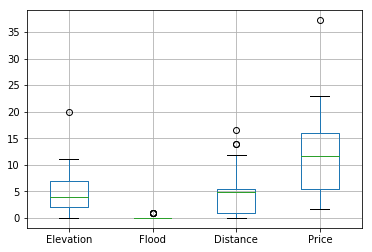

In [107]:
data.boxplot(column=['Elevation', 'Flood', 'Distance', 'Price'])

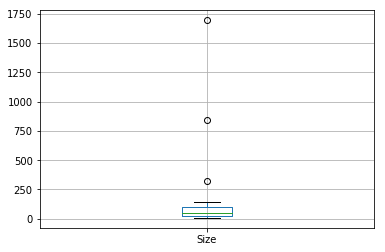

In [108]:
data.boxplot(column=['Size'])

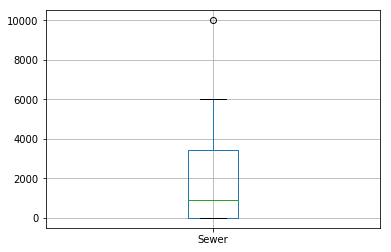

In [109]:
data.boxplot(column=['Sewer'])

In [110]:
#shifting price to the last column
data = data[['County', 'Size', 'Elevation', 'Sewer', 'Date', 'Flood','Distance', 'Price']]

In [111]:
# Sewer Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Sewer'] = sc.fit_transform(data[['Sewer']])

C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\5029874\AppData\Local\Continuum\anaconda3\envs\trainingenv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [112]:
# Convert Date diff from negative to positive 
data['Date'] = data['Date'].abs()

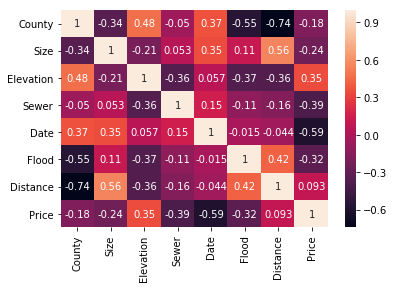

In [113]:
Var_Corr = data.corr()
# plot the heatmap and annotation on it
sb.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [114]:
#Distance is highly correlated with Flood, Size, County
#Drop Distance
data = data.drop('Distance', axis=1)

In [115]:
#size has very less coeff value so droping it
data = data.drop('Size', axis=1)

In [116]:
data = data.drop('Elevation', axis=1)

In [118]:
X = data.iloc[:,0:4] # independent variables
y = data.iloc[:,4]

In [119]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [120]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [121]:
reg = LinearRegression().fit(X_train, y_train)

In [122]:
reg.score(X_train, y_train)

0.6629698093646603

In [123]:
# Coefficient of variables with dependent variable
coeff_df = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(reg.coef_))], axis=1)
coeff_df.columns = ['Variable','Coeff']
coeff_df.sort_values(by=['Coeff'], inplace=True)
coeff_df

,Variable,Coeff
3,Flood,-10.347022
0,County,-3.039020
1,Sewer,-2.323288
2,Date,-0.134247


In [124]:
reg.intercept_ 

22.77280760331892

In [125]:
y_pred = reg.predict(X_test)

In [126]:
from sklearn.metrics import mean_squared_error

In [127]:
mean_squared_error(y_test, y_pred)

50.78752631489618

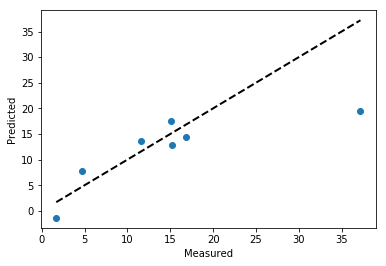

In [128]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()